# Homework 1

## Advection Eq
Given the advection equation in 1D $du/dt +du/dx =0$  build a numerical code to solve it on a grid with extent $x\in  [0; 10]$ and with initial conditions given by $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$. Solve the equation using the following schemes:

#  2-Lax-Friedrichs

C:\Users\demet\Desktop\Numerical relativity by Bruno\notebooks\Demetry's Hw solutions\HW_1. 1-Advection Eq


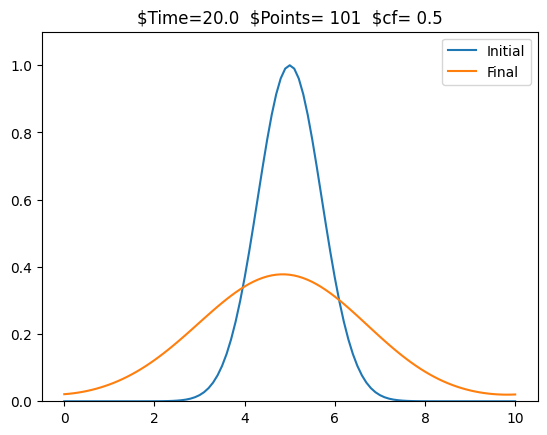

In [1]:
import numpy as np

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
j = 101    # Number of grid points
dx = L/(j-1)   # Grid spacing
x = np.linspace(0, L, j)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

# print('nx=',j)
# print('dx=',dx)
# print('dt=',dt)
# print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

#############################################################################################
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./images_Hw_1-1_Lax-Fried') # makedirs create a new directory in the operating system.

# os.listdir('C:/Users/demet/Desktop/Numerical relativity by Bruno/notebooks/Advection')
########################################################################################################

# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images_Hw_1-1_Lax-Fried/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = (np.roll(u_current,-1) + np.roll(u_current,1))/2 - a*(dt/(2*dx))*(np.roll(u_current, -1) - np.roll(u_current, 1))

    # Update the solution
    u_current = u_next.copy()


    #advance the time
    t += dt
    i += 1

    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./images_Hw_1-1_Lax-Fried/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

###############################################################################################################        
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('$Time='+str(round(t,2))+'  $Points= {}'.format(j) + '  $cf= {}'.format(cf))
plt.ylim(0,1.1)
plt.legend()
plt.show()       

In [2]:
# set the directory where your images are stored
directory = "./images_Hw_1-1_Lax-Fried/"

# get the list of image files in the directory
files = os.listdir(directory)

# print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

###########################################################################################################

import imageio
with imageio.get_writer('./movie_1-1_Lax-Fried.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images_Hw_1-1_Lax-Fried/'+file)
        writer.append_data(image)

files=[]

#########################################################################

# don't worry about the code in this cell, it is just to let you
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie_1-1_Lax-Fried.mp4" type="video/mp4">
</video></div>""")

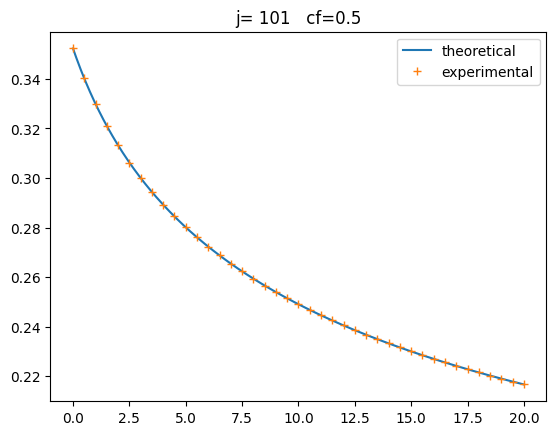

In [3]:
#Compare with data stored
l2_saved=np.genfromtxt('C:/Users/demet/Desktop/Numerical relativity by Bruno/notebooks/Advection/l2norm_LAX.dat', comments='#')
plt.plot(time,l2norm,label= 'theoretical')
plt.title("j= {}".format(j)+"   cf={}".format(cf))
plt.plot(l2_saved[:,0], l2_saved[:,1], '+', label= 'experimental')
plt.legend()
plt.show()

# My comments on the changes of j effects
1- As j increases, the final state of u plot becomes more close to the initial u plot ( In otherwords, u_final increases with j)

2- L2 norm is not alined wth the experimental values anymore and it becomes more stable(L2 norm values are higher than the experimental "+"
** nothing is experimental
# changing cf effects
- the cf lower cf creates more dissipated function(the u final is lower than u_initial) and the l2 norm is lower than the experimental

I have to explain why this is correct from the equations too
like this "because we saw that in the equations"

- # Final result: cf and j are proportional to l2 norm and u_final in Lax-Friedrichs Method.